In [1]:
from qwak.qwak import QWAK

In [2]:
import networkx as nx
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import sqrt, ceil, pow
import scipy.special as sp
from scipy.linalg import expm
import sympy as simp

In [3]:
def stream_path(n,alpha):
    B = np.matrix(np.zeros((n,n), dtype='complex'))
    for x in range(n-1):
        B[x,x+1] = np.exp(1j*alpha)

    return B + B.H

def inf_line_bessel(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        psi[x,0] = 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
        psi[x,0] += 1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)

    return np.abs(np.array(psi))**2

In [98]:
n=5
x0 = 0
n1 = 100
t  = 20
alpha=np.pi/2
# print(stream_path(n,alpha))
# print()
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()

# for u,v,d in H.edges(data=True):
#     d["weight"] = np.exp(1j*alpha)
#     mat = np.matrix(d["weight"])
#
# for u,v,d in G.edges(data=True):
#     d["weight"] = np.exp(-1j*alpha)
#     mat = np.matrix(d["weight"])
#
#
# graph = nx.compose(H,G)

# qw2.runWalk(t,[n//2-3,n//2 +3])
# plt.plot(qw2.getProbDistVec())
# print(qw2.getAdjacencyMatrix())
# print()
# print(np.matrix(qw2.getAdjacencyMatrix()).round(decimals=0) == np.matrix(stream_path(n,alpha)).round(decimals=0))

# psi_bessel = inf_line_bessel(x0,n1,t,alpha)
# plt.plot(psi_bessel)

[[0 1 0 0 1]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [1 0 0 1 0]]
0
1
0
0
1

1
0
1
0
0

0
1
0
1
0

0
0
1
0
1

1
0
0
1
0



In [70]:
# def inf_line_bessel_oriented(x0,nx,t,alpha):
#     domain = np.arange(x0 - nx, x0 + nx + 1)
#     psi = np.zeros([2*nx + 1,1], dtype='complex')
#
#     for x in range(2*nx + 1):
#         psi[x,0] = (np.exp(-1j*alpha/2))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)/np.sqrt(2)
#         psi[x,0] += (np.exp(1j*alpha/2))*1j**(np.abs(domain[x]-x0-1))*sp.jv(np.abs(domain[x] - x0 - 1), 2*t)/np.sqrt(2)
#
#     return np.abs(np.array(psi))**2

In [18]:
# x0 = 100
# n0 = 100
# t  = 20
# alpha=np.pi/2
#
# psi_oriented = inf_line_bessel_oriented(x0,n0,t,alpha)
# plt.plot(psi_oriented)

In [11]:
# def inf_line_bessel_oriented2(x0,nx,t,alpha):
#     domain = np.arange(x0 - nx, x0 + nx + 1)
#     prob = np.zeros([2*nx + 1,1], dtype='complex')
#
#     for x in range(2*nx + 1):
#         prob[x,0] = (1/2)*(
#                         -1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t)**2
#
#                        - 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)**2
#
#                        +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)
#
#                        +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))
#
#     return prob

In [12]:
# x0 = 1
# n0 = 100
# t  = 20
# alpha=np.pi/2
#
# psi_oriented = inf_line_bessel_oriented2(x0,n0,t,alpha)
# plt.plot(psi_oriented)

In [92]:
def inf_line_bessel_oriented3(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        # prob[x,0] = (1/2)*(
        #                 sp.jv(np.abs(domain[x] + x0), 2*t)**2
        #
        #                +sp.jv(np.abs(domain[x] - x0), 2*t)**2
        #
        #                -2* np.cos(-2*alpha)*sp.jv(np.abs(domain[x] + x0), 2*t)*sp.jv(np.abs(domain[x] - x0), 2*t))

        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)**2

                       +sp.jv(domain[x] - x0, 2*t)**2

                       -2* np.cos(-2*alpha*x0)*sp.jv(domain[x] + x0, 2*t)*sp.jv(domain[x] - x0, 2*t))


    return prob


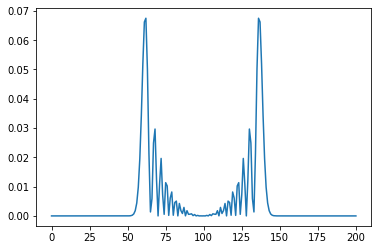

In [93]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented3(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [10]:
def psi_bessel(x0,nx,t,alpha,x):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')
    psi[x,0] = (1/np.sqrt(2)) * (np.exp(-1j*alpha*(x+x0))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t) + np.exp(-1j*alpha*(x-x0))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))
    return psi

def psi_bessel_conjugate(x0,nx,t,alpha,x):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    psi = np.zeros([2*nx + 1,1], dtype='complex')
    psi[x,0] = np.conjugate((1/np.sqrt(2)) * (np.exp(-1j*alpha*(x+x0))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t) + np.exp(-1j*alpha*(x-x0))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)))
    return psi

def inf_line_bessel_oriented4(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = psi_bessel(x0,nx,t,alpha,x)[x,0] * psi_bessel_conjugate(x0,nx,t,alpha,x)[x,0]
    return prob

[[-8.35633704e-28-1.0357981e-43j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j]
 [ 0.00000000e

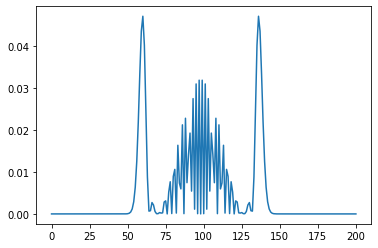

In [58]:
x0 = 2
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented4(x0,n0,t,alpha)
plt.plot(psi_oriented)


In [ ]:
# print(qw2.getProbDistVec().round(decimals=0) == psi_oriented.round(decimals=0))


In [19]:
def inf_line_bessel_oriented5(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = (1/2)*(
                        1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t)*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))

                       + 1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0),2*t))

                       +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)

                       +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))

    return prob

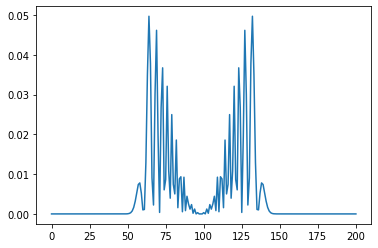

In [55]:
x0 = 2
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented5(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [61]:
def inf_line_bessel_oriented6(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        prob[x,0] = (1/2)*(
                        sp.jv(np.abs(domain[x] + x0), 2*t)**2

                       + sp.jv(np.abs(domain[x] - x0), 2*t)**2

                       +(np.exp(1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))*1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t)

                       +(np.exp(-1j*2*alpha))*np.conjugate(1j**(np.abs(domain[x]-x0))*sp.jv(np.abs(domain[x] - x0), 2*t))*1j**(np.abs(domain[x]+x0))*sp.jv(np.abs(domain[x] + x0), 2*t))

    return prob

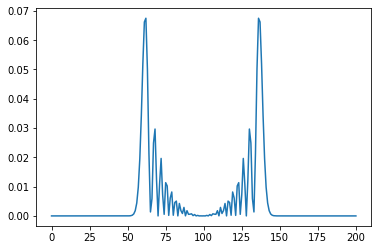

In [62]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented6(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [94]:
def inf_line_bessel_oriented7(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx + 1):
        # prob[x,0] = (1/2)*(
        #                 sp.jv(np.abs(domain[x] + x0), 2*t)**2
        #
        #                + sp.jv(np.abs(domain[x] - x0), 2*t)**2
        #
        #                -(np.exp(1j*2*alpha))*np.conjugate(sp.jv(np.abs(domain[x] + x0), 2*t))*sp.jv(np.abs(domain[x] - x0), 2*t)
        #
        #                -(np.exp(-1j*2*alpha))*np.conjugate(sp.jv(np.abs(domain[x] - x0), 2*t))*sp.jv(np.abs(domain[x] + x0), 2*t))

        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)**2

                       + sp.jv(domain[x] - x0, 2*t)**2

                       -(np.exp(1j*2*alpha))*(sp.jv(domain[x] + x0, 2*t))*sp.jv(domain[x] - x0, 2*t)

                       -(np.exp(-1j*2*alpha))*(sp.jv(domain[x] - x0, 2*t))*sp.jv(domain[x] + x0, 2*t))

    return prob

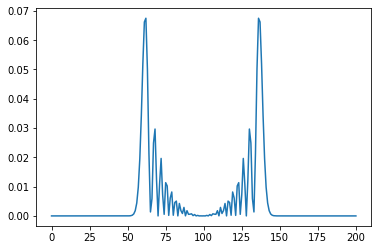

In [98]:
x0 = 1
n0 = 100
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented7(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [62]:
def inf_line_bessel_oriented8(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx):
        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)**2

                       + sp.jv(domain[x] - x0, 2*t)**2

                       -2*(np.cos(2*alpha))*(sp.jv(domain[x] + x0, 2*t))*sp.jv(domain[x] - x0, 2*t))

    return prob

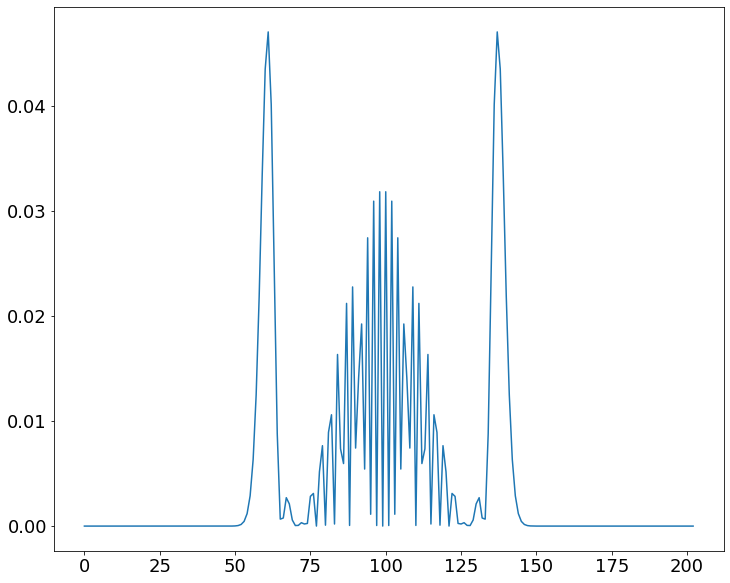

In [65]:
x0 = 2
n0 = 101
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented8(x0,n0,t,alpha)
plt.plot(psi_oriented)

In [4]:
def inf_line_bessel_oriented9(x0,nx,t,alpha):
    domain = np.arange(x0 - nx, x0 + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx):
        prob[x,0] = (1/2)*(
                        sp.jv(domain[x] + x0, 2*t)
                       + sp.jv(domain[x] - x0, 2*t))**2

    return prob

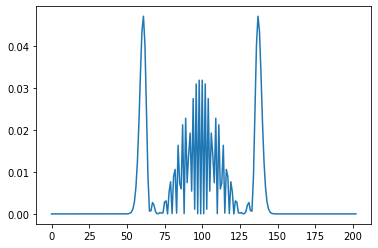

In [5]:
x0 = 2
n0 = 101
t  = 20
alpha=np.pi/2

psi_oriented = inf_line_bessel_oriented9(x0,n0,t,alpha)
plt.plot(psi_oriented)

[0, 1.5707963267948966, 1.0471975511965976]
[[(0.5674297786682916+0j), (0.6060225564620879+0j), (0.6421288162472504+0j), (0.6679467834816091+0j), (0.6796943163965711+0j), (0.6786920319515202+0j), (0.6695415039066988+0j), (0.656607482027263+0j), (0.6410695508659987+0j), (0.6204753235027759+0j), (0.5911701780785266+0j), (0.5521175871775745+0j), (0.5075980637140165+0j), (0.4667602063772889+0j), (0.43978423864349636+0j), (0.4325017844636337+0j), (0.44246244656858025+0j), (0.45890766797210814+0j), (0.4671122206825757+0j), (0.45515338268978134+0j), (0.4197127787000678+0j), (0.3678641529323445+0j), (0.31382101402031076+0j), (0.2722420865517311+0j), (0.2514963062021878+0j), (0.250285624121341+0j), (0.259214736186375+0j), (0.2662730982696707+0j), (0.2631850125452423+0j), (0.24926156469967733+0j), (0.23088361003164315+0j), (0.21718867997137506+0j), (0.21456008431684123+0j), (0.22302887976595798+0j), (0.23647633391798928+0j), (0.2463141732818943+0j), (0.246393025022699+0j), (0.2363107838129324+0j

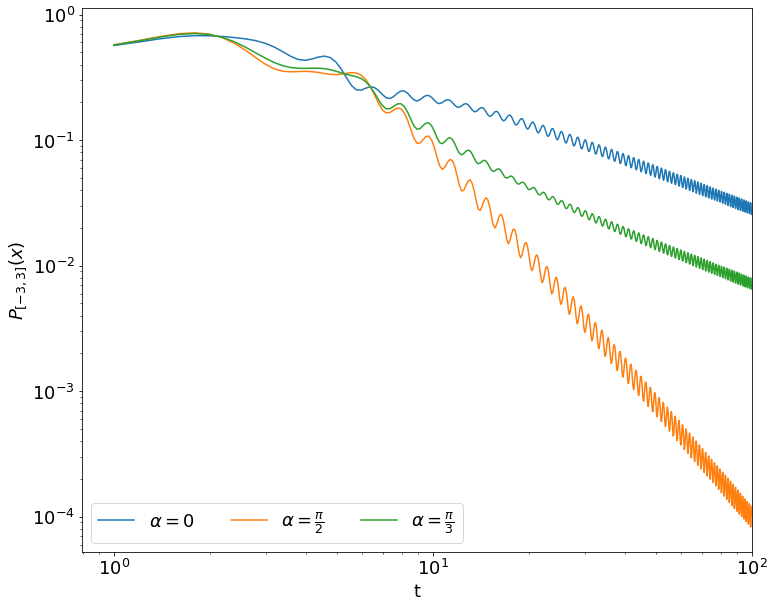

In [12]:
x0 = 3
n0 = 500
t  = 0
alpha=np.pi/2
alphaLen = range(2,4)
alphaList=[0] + [np.pi/(n) for n in alphaLen]
print(list(alphaList))
timeList = np.linspace(1,100,500)
timeListList = [timeList]*len(alphaList)
prob = []
probList = []

for alpha in alphaList:
    for t in timeList:
        psi_oriented = inf_line_bessel_oriented8(x0,n0,t,alpha)
        prob.append(np.sum(psi_oriented[n0-x0-1:n0+x0+2]))
    probList.append(prob)
    prob = []

plt.loglog()
for probability,alpha in zip(probList,[0] + list(alphaLen)):
    if alpha == 0:
        plt.plot(timeList,probability,label=r"$\alpha = 0$")
    else:
        plt.plot(timeList,probability,label=r"$\alpha = \frac{\pi}{%s}$"%str(alpha))

plt.xlim([0,100])
print(probList)

mpl.rcParams['figure.figsize'] = [12, 10]
plt.legend(loc="lower left", ncol=len(alphaList),fontsize=18)
plt.ylabel(r"$P_{[-%s,%s]}(x)$"%(x0,x0),fontsize=18)
plt.xlabel("t",fontsize=18)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
plt.show()


In [67]:
def inf_line_bessel_oriented10(k,nx,t,alpha,theta,gamma):
    domain = np.arange(k - nx, k + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')

    for x in range(2*nx):
        prob[x,0] = ( (np.cos(theta)**2) * (sp.jv(domain[x] + k, 2*t)**2)
                    + (np.sin(theta)**2) * (sp.jv(domain[x] - k, 2*t)**2)
                    - np.cos(2*alpha*k + gamma)*np.sin(2*theta)*sp.jv(domain[x] + k, 2*t)*sp.jv(domain[x] - k, 2*t))
    return prob

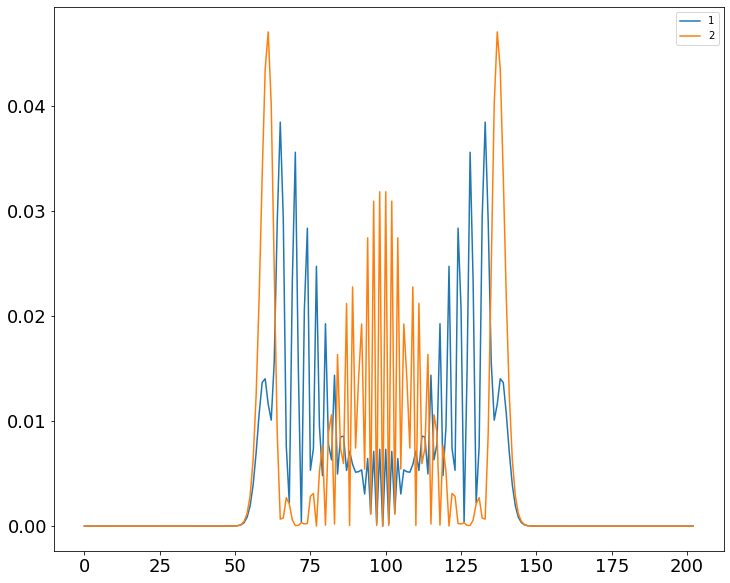

In [72]:
k = 2
n0 = 101
t  = 20
alpha=np.pi/2
theta=np.pi/4
gammaN = 1

psi_oriented = inf_line_bessel_oriented10(k,n0,t,alpha,theta,gammaN)
plt.plot(psi_oriented,label="1")

psi_oriented2 = inf_line_bessel_oriented9(k,n0,t,alpha)
plt.plot(psi_oriented2,label="2")
plt.legend()

In [34]:
def inf_line_bessel_oriented11(k,nx,t,alpha,theta,gammaN):
    domain = np.arange(k - nx, k + nx + 1)
    prob = np.zeros([2*nx + 1,1], dtype='complex')
    gamma = np.pi*gammaN

    print((k+gammaN)%2!=0)
    print((k+gammaN)%2==0)
    if (k+gammaN)%2!=0:
        for x in range(2*nx):
            prob[x,0] = ( (np.cos(theta)) * (sp.jv(domain[x] + k, 2*t))
                        + (np.sin(theta)) * (sp.jv(domain[x] - k, 2*t)))**2
    else:
        for x in range(2*nx):
            prob[x,0] = ( (np.cos(theta)) * (sp.jv(domain[x] + k, 2*t))
                        - (np.sin(theta)) * (sp.jv(domain[x] - k, 2*t)))**2

    return prob

False
True


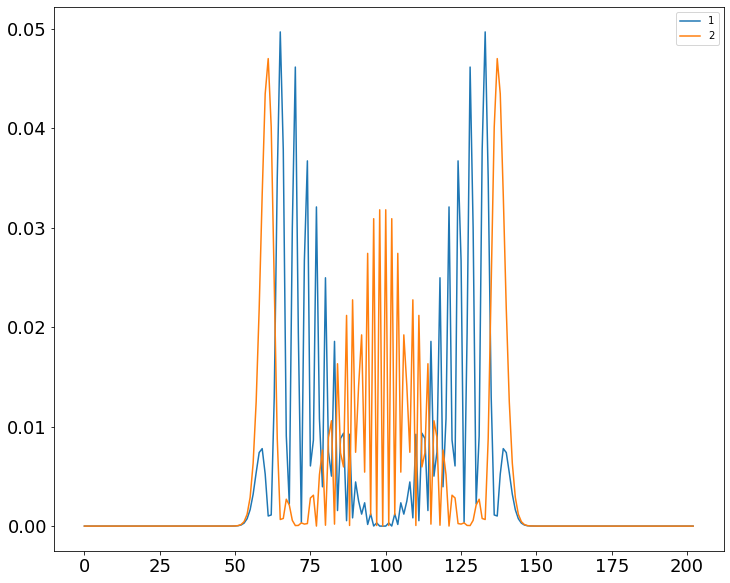

In [85]:
k = 2
n0 = 101
t  = 20
alpha=np.pi/2
theta=np.pi/4
gammaN = 0

psi_oriented = inf_line_bessel_oriented11(k,n0,t,alpha,theta,gammaN)
plt.plot(psi_oriented,label="1")

psi_oriented2 = inf_line_bessel_oriented8(k,n0,t,alpha)
plt.plot(psi_oriented2,label="2")
plt.legend()

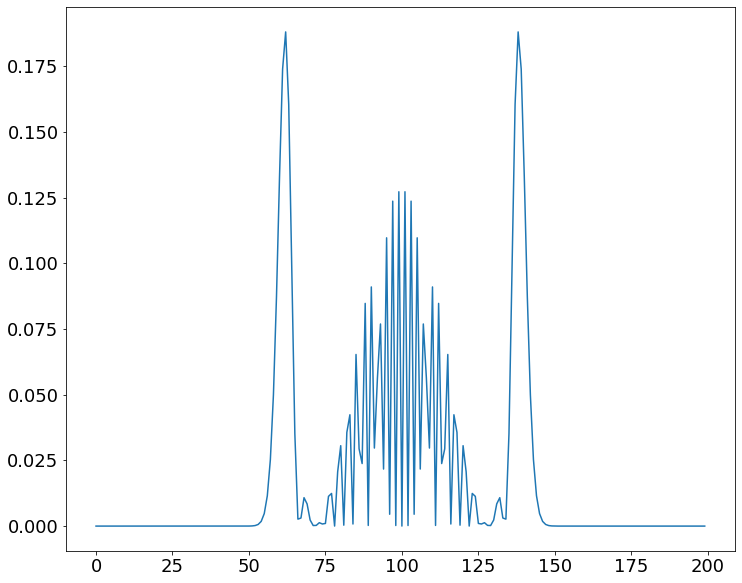

In [87]:
n=200
H = nx.path_graph(n,create_using=nx.DiGraph)
G = H.reverse()
k = 2

for u,v,d in H.edges(data=True):
    d["weight"] = np.exp(1j*alpha*k)
    mat = np.matrix(d["weight"])

for u,v,d in G.edges(data=True):
    d["weight"] = np.exp(-1j*alpha*k)
    mat = np.matrix(d["weight"])


graph = nx.compose(H,G)

qw = QWAK(graph)
qw.runWalk(t,customStateList = [(n//2-k,np.sqrt(2)),(n//2+k,np.sqrt(2))])
plt.plot(qw.getProbDistVec())